### Integrantes: 
- Sofia Marcano 
- Carmen Samaniego
- Daniela Donado


#### Punto 1 Análisis exploratorio de las variables de interés


#### Cargamos los datos para obtener las variables de interés

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

data = pd.read_csv("heart_attack_prediction_dataset.csv")

#### Datos atípicos en variables cuantitativas

In [5]:
def datos_atipicos(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    outliers = columna[(columna < lower_lim) | (columna > upper_lim)]
    if outliers.empty:
        print(f"No hay valores atípicos en {columna.name}")
    else:
        print(f"Valores atípicos en {columna.name}:", outliers)
    
    return outliers
    

# Aplicar la función a la columna 'Cholesterol'
outliers_cholesterol = datos_atipicos(data['Cholesterol'])


#Aplicar la función a la columna 'Heart Rate'
outliers_heart_rate = datos_atipicos(data['Heart Rate'])


#Aplicar la función a la columna 'Excersice hours per week'
outliers_exercise_hours = datos_atipicos(data['Exercise Hours Per Week'])


#Aplicar la función a la columna 'BMI'   
outliers_bmi = datos_atipicos(data['BMI'])

#Aplicar la función a la columna 'Sleep Hours Per Day'
outliers_sleep_hours = datos_atipicos(data['Sleep Hours Per Day'])


No hay valores atípicos en Cholesterol
No hay valores atípicos en Heart Rate
No hay valores atípicos en Exercise Hours Per Week
No hay valores atípicos en BMI
No hay valores atípicos en Sleep Hours Per Day


### Graficación de Diagrama de cajas y bigotes

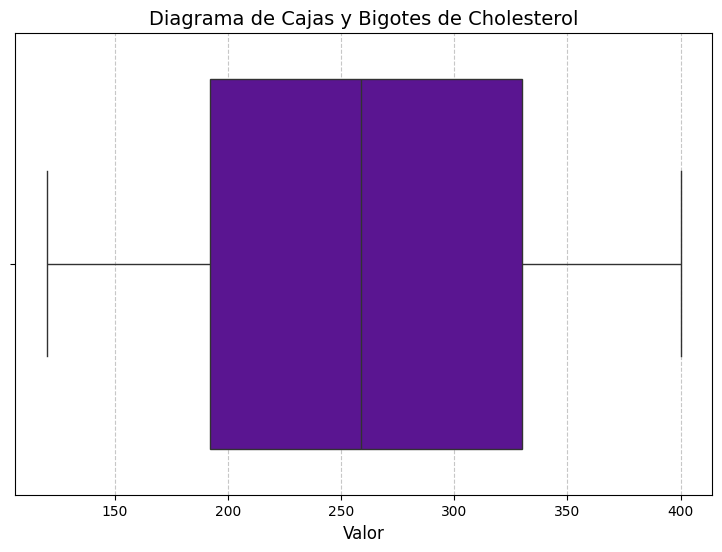

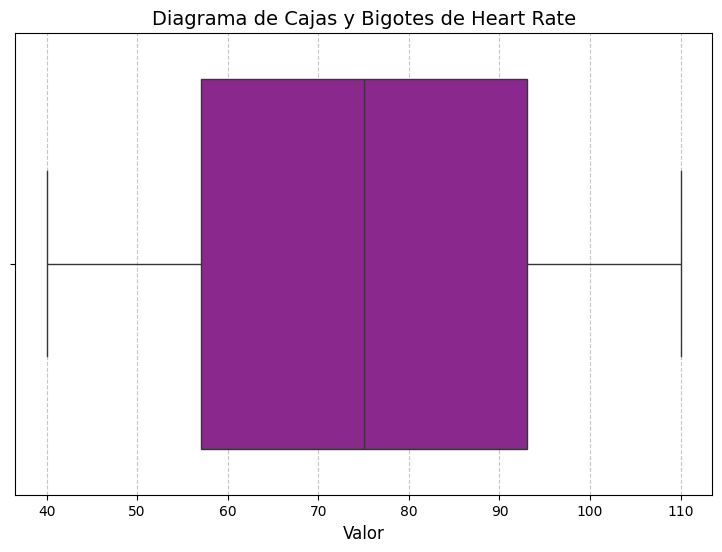

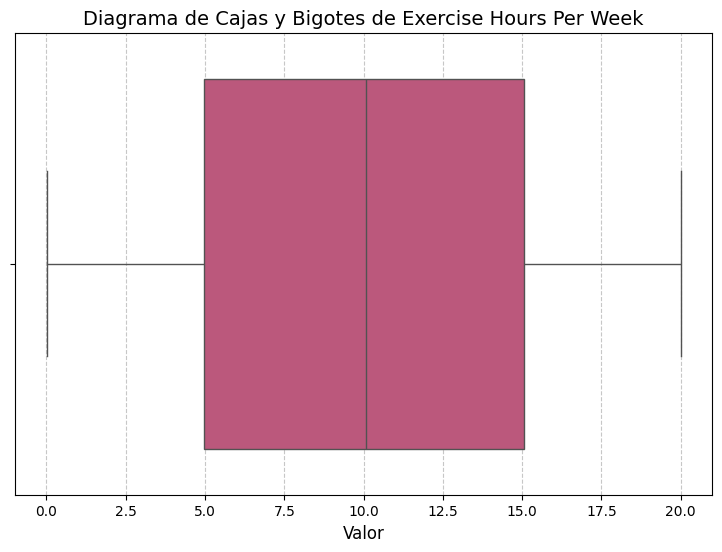

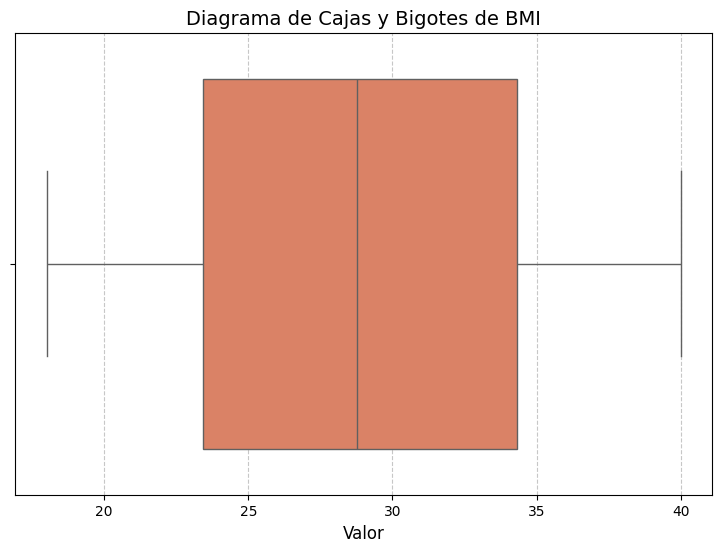

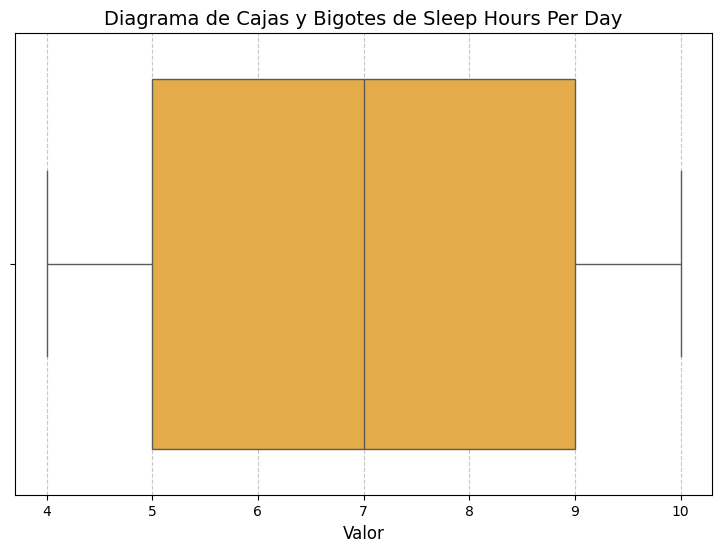

In [6]:
columnas = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day']   
colores = sns.color_palette("plasma", len(columnas))

def graficar_boxplot(columna, color):
    plt.figure(figsize=(9, 6))
    sns.boxplot(x=columna, orient="h", color=color)

    plt.title(f"Diagrama de Cajas y Bigotes de {columna.name}", fontsize=14 )
    plt.xlabel("Valor", fontsize=12)
    plt.yticks(rotation=45)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

for i, col in enumerate(columnas):
    graficar_boxplot(data[col], colores[i])

### Prueba de presencia de datos ausentes

In [7]:
print(data.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


##### No se presentaron datos ausentes en el dataset, por tanto, no es necesario eliminar o reemplazar estos valores por la media o mediana

#### Cálculo de media y mediana

In [8]:
def medidas_tendencia_central(columna):
    media = columna.mean()
    mediana = columna.median()
    return media, mediana

print("Los valores de media y mediana de las variables evaluadas son:\n")
for i in columnas:
    media, mediana = medidas_tendencia_central(data[i])
    print(f"{i} \n Media: {media:.2f} y Mediana: {mediana:.2f}\n")
    
tendencia = {} # Diccionario para almacenar los resultados
for i in columnas:
    media, mediana = medidas_tendencia_central(data[i])
    tendencia[i] = {"media": media, "mediana": mediana}

Los valores de media y mediana de las variables evaluadas son:

Cholesterol 
 Media: 259.88 y Mediana: 259.00

Heart Rate 
 Media: 75.02 y Mediana: 75.00

Exercise Hours Per Week 
 Media: 10.01 y Mediana: 10.07

BMI 
 Media: 28.89 y Mediana: 28.77

Sleep Hours Per Day 
 Media: 7.02 y Mediana: 7.00



#### Uso de histogramas para analizar la distribución de las variables

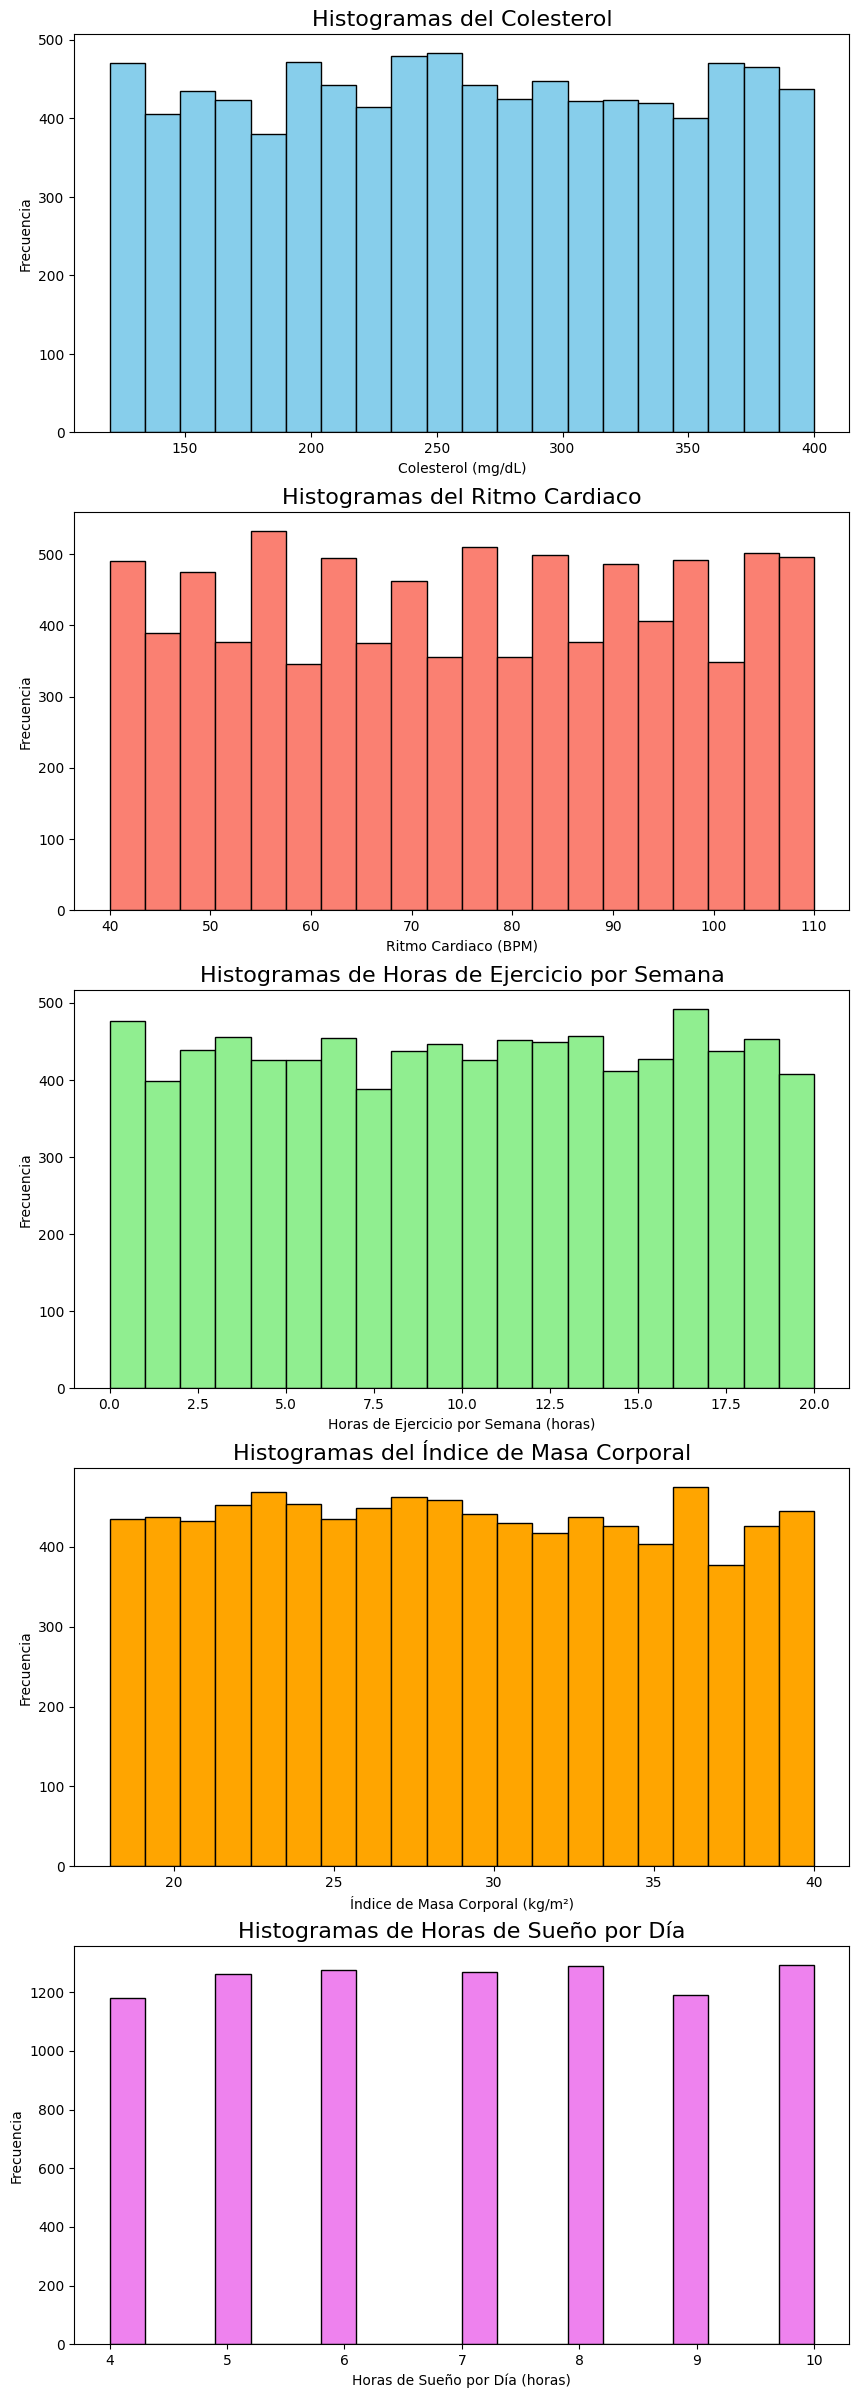

In [9]:
colores = ["skyblue", "salmon", "lightgreen", "orange", "violet"]

variables = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day']
titulos = ["Histogramas del Colesterol", "Histogramas del Ritmo Cardiaco", "Histogramas de Horas de Ejercicio por Semana", "Histogramas del Índice de Masa Corporal", "Histogramas de Horas de Sueño por Día"]
eje_x= ["Colesterol (mg/dL)", "Ritmo Cardiaco (BPM)", "Horas de Ejercicio por Semana (horas)", "Índice de Masa Corporal (kg/m²)", "Horas de Sueño por Día (horas)"]

fig, ax = plt.subplots(5, 1, figsize=(10, 30))

for i, var in enumerate(variables):
    ax[i].hist(data[var], bins=20, color=colores[i], edgecolor="black")
    ax[i].set_title(titulos[i], fontsize=16)
    ax[i].set_xlabel(eje_x[i])
    ax[i].set_ylabel("Frecuencia")


#### Análisis de variabilidad

In [13]:

columnas = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Sleep Hours Per Day']

def medidas_variacion(columna, media, mediana):
    desviaciones = abs(columna - mediana)
    MAD = np.median(desviaciones)
    std = np.std(columna)
    CV = (std/media)*100
    kurt = kurtosis(columna, fisher=True)
    return MAD, std, CV, kurt

for i in columnas:
    media = tendencia[i]["media"]
    mediana = tendencia[i]["mediana"]
    MAD, std, CV, kurt = medidas_variacion(data[i], media, mediana)
    
    
    print(f"\nPara la variable {i}:")
    print(f"La Desviación absoluta a la mediana es: {MAD:.2f}")
    print(f"La desviación estándar es: {std:.2f}")
    print(f"El coeficiente de variación es: {CV:.2f} %")
    print(f"La curtosis es: {kurt:.2f}")

    



Para la variable Cholesterol:
La Desviación absoluta a la mediana es: 69.00
La desviación estándar es: 80.86
El coeficiente de variación es: 31.11 %
La curtosis es: -1.18

Para la variable Heart Rate:
La Desviación absoluta a la mediana es: 18.00
La desviación estándar es: 20.55
El coeficiente de variación es: 27.39 %
La curtosis es: -1.21

Para la variable Exercise Hours Per Week:
La Desviación absoluta a la mediana es: 5.03
La desviación estándar es: 5.78
El coeficiente de variación es: 57.75 %
La curtosis es: -1.20

Para la variable BMI:
La Desviación absoluta a la mediana es: 5.45
La desviación estándar es: 6.32
El coeficiente de variación es: 21.87 %
La curtosis es: -1.19

Para la variable Sleep Hours Per Day:
La Desviación absoluta a la mediana es: 2.00
La desviación estándar es: 1.99
El coeficiente de variación es: 28.31 %
La curtosis es: -1.23


### Descripción sobre el tipo de distribución que presentan las variables y nivel de variabilidad

#### La variable Cholesterol 
Presenta una distribución aproximadamente simétrica, con media cercana a la mediana, aunque con cierta dispersión (CV alto). No se observa una cola muy marcada. Su curtosis negativa sugiere una distribución platicúrtica que conlleva a una distribución de datos con pocos valores extremos.
.
#### La variable Heart Rate
Presenta una distribución relativamente simétrica, con media y mediana cercanas. La dispersión es moderada (CV medio), lo que indica cierta variabilidad entre individuos. No se evidencian colas pesadas. Su curtosis negativa indica que las frecuencias cardíacas tienden a agruparse alrededor del promedio sin casos atípicos marcados.

#### La variable Exercise Hours Per Week
Evidencia una distribución asimétrica hacia la derecha (cola positiva), con mediana menor que la media. Esto indica que la mayoría de personas realiza pocas horas de ejercicio, pero existen algunos valores altos que elevan el promedio. La dispersión es alta. Presenta un nivel de curtosis menor que 0, lo que conlleva a la baja presencia de valores extremos.

#### La variable BMI
Presenta una distribución muy levemente sesgada hacia la derecha, aunque con media y mediana relativamente próximas. La dispersión es moderada, reflejando variabilidad en la composición, pero sin colas extremas muy notorias. Su curtosis negativa determina una distribución platicúrtica al tener poca presencia de datos extremos.

#### Sleep Hours Per Day
Presenta una distribución bastante simétrica, con valores concentrados en torno a la media y baja dispersión (CV bajo). Por tanto, se observa un patrón más homogéneo en las horas de sueño, sin presencia de una cola marcada. Su curtosis negativa conlleva a una ditribución de datos con pocos valores extremos.
